In [3]:
import sys
sys.path.append('../../activedrops')
import os
import pandas as pd
import viz
import pivdrops

viz.set_plotting_style()

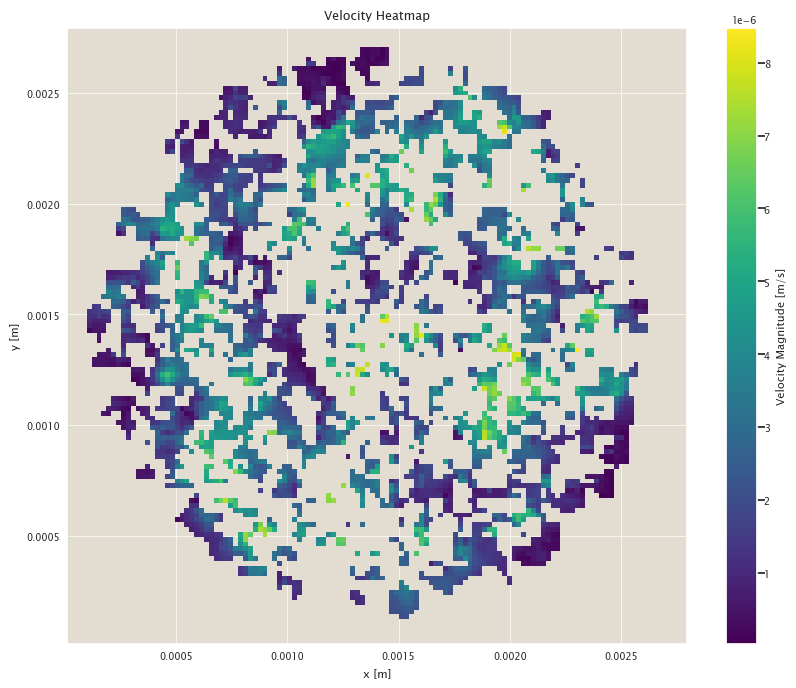

In [4]:
# Assuming you've uploaded and provided the path to the uploaded file
df = pd.read_csv('C:/Users/dalar/OneDrive/Desktop/current_experiment/100223-kbio-500_250_125nM/pos1-250nM/piv-pos1-250nM/txt-250nM-complete_movie/PIVlab_0001.txt', sep=',', skiprows=2)

from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np

# Extract data for heatmap
x = df['x [m]'].values
y = df['y [m]'].values
magnitude = df['magnitude [m/s]'].values

# Create a meshgrid for heatmap visualization
xi = np.linspace(x.min(), x.max(), len(np.unique(x)))
yi = np.linspace(y.min(), y.max(), len(np.unique(y)))

# Create the griddata for heatmap visualization
zi = griddata((x, y), magnitude, (xi[None, :], yi[:, None]), method='linear')

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
c = ax.pcolormesh(xi, yi, zi, shading='auto', cmap='viridis')
ax.set_title("Velocity Heatmap")
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
fig.colorbar(c, ax=ax, label="Velocity Magnitude [m/s]")

plt.show()


In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import griddata

# Base directory and pattern for input .txt files
input_dir = 'C:/Users/dalar/OneDrive/Desktop/current_experiment/100223-kbio-500_250_125nM/pos1-250nM/piv-pos1-250nM/txt-250nM-complete_movie/'
input_pattern = os.path.join(input_dir, 'PIVlab_*.txt')

# Directory to save output plots
output_dir = 'C:/Users/dalar/OneDrive/Desktop/current_experiment/100223-kbio-500_250_125nM/pos1-250nM/plots/velocity_heatmap/'

# Determine the global min and max values of the velocity magnitude
global_min_magnitude = float('inf')
global_max_magnitude = float('-inf')

for filepath in glob.glob(input_pattern):
    df = pd.read_csv(filepath, sep=',', skiprows=2)
    local_min = df['magnitude [m/s]'].min()
    local_max = df['magnitude [m/s]'].max()
    
    global_min_magnitude = min(global_min_magnitude, local_min)
    global_max_magnitude = max(global_max_magnitude, local_max)

# Use these values to fix the range of the colormap when plotting each heatmap
for filepath in glob.glob(input_pattern):
    frame_num = os.path.basename(filepath).split('_')[-1].split('.')[0]
    df = pd.read_csv(filepath, sep=',', skiprows=2)
    df['x [mm]'] = df['x [m]'] * 1000
    df['y [mm]'] = df['y [m]'] * 1000

    x = df['x [mm]'].values
    y = df['y [mm]'].values
    magnitude = df[].values
    xi = np.linspace(x.min(), x.max(), len(np.unique(x)))
    yi = np.linspace(y.min(), y.max(), len(np.unique(y)))
    zi = griddata((x, y), magnitude, (xi[None, :], yi[:, None]), method='linear')

    fig, ax = plt.subplots(figsize=(10, 8))
    c = ax.pcolormesh(xi, yi, zi, shading='auto', cmap='viridis', vmin=global_min_magnitude, vmax=global_max_magnitude)
    ax.set_title(f"Velocity Heatmap - Frame {frame_num}")
    ax.set_xlabel("x [mm]")
    ax.set_ylabel("y [mm]")
    fig.colorbar(c, ax=ax, label="Velocity Magnitude [m/s]")

    filename = f'velocity_heatmap_{frame_num}.png'
    fig.savefig(os.path.join(output_dir, filename))
    plt.close(fig)

"Global min and max determined, and all plots saved with consistent heatmap range!"


In [ ]:
df

In [ ]:
def plot_feature_heatmaps_v2(feature_column, input_dir, output_dir):
    """
    Plots heatmaps for a given feature across all frames and saves them.

    Args:
    - feature_column (str): Name of the column in the .txt files that represents the desired feature.
    - input_dir (str): Directory where the .txt files are located.
    - output_dir (str): Directory where the output plots should be saved.
    """
    
    # Extract feature label from column name
    feature_label = feature_column.split('[')[0].strip().title()
    
    # Pattern for input .txt files
    input_pattern = os.path.join(input_dir, 'PIVlab_*.txt')

    # Determine the global min and max values of the chosen feature
    global_min_feature = float('inf')
    global_max_feature = float('-inf')

    for filepath in glob.glob(input_pattern):
        df = pd.read_csv(filepath, sep=',', skiprows=2)
        local_min = df[feature_column].min()
        local_max = df[feature_column].max()
        global_min_feature = min(global_min_feature, local_min)
        global_max_feature = max(global_max_feature, local_max)

    # Use these values to fix the range of the colormap when plotting each heatmap
    for filepath in glob.glob(input_pattern):
        frame_num = os.path.basename(filepath).split('_')[-1].split('.')[0]
        df = pd.read_csv(filepath, sep=',', skiprows=2)
        df['x [mm]'] = df['x [m]'] * 1000
        df['y [mm]'] = df['y [m]'] * 1000

        x = df['x [mm]'].values
        y = df['y [mm]'].values
        feature_values = df[feature_column].values
        xi = np.linspace(x.min(), x.max(), len(np.unique(x)))
        yi = np.linspace(y.min(), y.max(), len(np.unique(y)))
        zi = griddata((x, y), feature_values, (xi[None, :], yi[:, None]), method='linear')

        fig, ax = plt.subplots(figsize=(10, 8))
        c = ax.pcolormesh(xi, yi, zi, shading='auto', cmap='viridis', vmin=global_min_feature, vmax=global_max_feature)
        ax.set_title(f"{feature_label} Heatmap - Frame {frame_num}")
        ax.set_xlabel("x [mm]")
        ax.set_ylabel("y [mm]")
        fig.colorbar(c, ax=ax, label=feature_column)

        filename = f'{feature_label.replace(" ", "_").lower()}_heatmap_{frame_num}.png'
        fig.savefig(os.path.join(output_dir, filename))
        plt.close(fig)

    return f"Global min and max of {feature_label} determined, and all plots saved with consistent heatmap range!"



In [ ]:
input_dir = 'C:/Users/dalar/OneDrive/Desktop/current_experiment/100223-kbio-500_250_125nM/pos1-250nM/piv-pos1-250nM/txt-250nM-complete_movie/'
output_dir = 'C:/Users/dalar/OneDrive/Desktop/current_experiment/100223-kbio-500_250_125nM/pos1-250nM/plots/vorticity_heatmap/'

plot_feature_heatmaps_v2('vorticity [1/s]', input_dir, output_dir)


In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import griddata

def plot_feature_heatmaps(feature_keyword, input_dir, output_dir, log_scale=False, snap_mode=False):
    """
    Plots heatmaps for a given feature across all frames and saves them.
    
    Args:
    - feature_keyword (str): Keyword representing the desired feature (e.g., "velocity", "vorticity").
    - input_dir (str): Directory where the .txt files are located.
    - output_dir (str): Directory where the output plots should be saved.
    - log_scale (bool): If set to True, the feature values will be plotted in logarithmic scale. Default is False.
    - snap_mode (bool): If set to True, will only display the first frame without saving. Default is False.
    """
    
    # Mapping from user-friendly keywords to actual column names in the .txt files
    feature_mapping = {
        'velocity': 'magnitude [μm/s]',  # Updated to micrometers per second
        'vorticity': 'vorticity [1/s]',
        'divergence': 'divergence [1/s]',
        'shear': 'simple shear [1/s]',
        'strain': 'simple strain [1/s]'
    }
    
    # Get the actual feature column from the mapping
    feature_column = feature_mapping.get(feature_keyword)
    if not feature_column:
        return f"Unknown feature keyword '{feature_keyword}'. Please use one of {list(feature_mapping.keys())}."
    
    # Extract feature label from column name
    feature_label = feature_column.split('[')[0].strip().title()
    
    # Pattern for input .txt files
    input_pattern = os.path.join(input_dir, 'PIVlab_*.txt')

    # Determine the global min and max values of the chosen feature
    global_min_feature = float('inf')
    global_max_feature = float('-inf')

    for filepath in glob.glob(input_pattern):
        df = pd.read_csv(filepath, sep=',', skiprows=2)
        
        # Add a new column for velocity in micrometers per second (μm/s)
        if 'magnitude [m/s]' in df.columns:
            df['magnitude [μm/s]'] = df['magnitude [m/s]'] * 1e6
        
        if log_scale:
            if df[feature_column].min() <= 0:
                raise ValueError("Cannot plot in log scale when there are non-positive values.")
            df[feature_column] = np.log(df[feature_column])
        local_min = df[feature_column].min()
        local_max = df[feature_column].max()
        global_min_feature = min(global_min_feature, local_min)
        global_max_feature = max(global_max_feature, local_max)

    # Do not center the colorbar for velocity
    if feature_keyword != 'velocity':
        max_abs = max(abs(global_min_feature), abs(global_max_feature))
        global_min_feature = -max_abs
        global_max_feature = max_abs

    # Construct a new sub-directory path
    sub_dir = os.path.join(output_dir, f"{feature_keyword}_heatmap")

    # Ensure the sub-directory exists
    if not os.path.exists(sub_dir):
        os.makedirs(sub_dir)

    # Use these values to fix the range of the colormap when plotting each heatmap
    filepaths = sorted(glob.glob(input_pattern))
    for index, filepath in enumerate(filepaths):
        frame_num = os.path.basename(filepath).split('_')[-1].split('.')[0]
        df = pd.read_csv(filepath, sep=',', skiprows=2)
        df['x [mm]'] = df['x [m]'] * 1000
        df['y [mm]'] = df['y [m]'] * 1000

        # Ensure the velocity column in micrometers per second is present
        if 'magnitude [m/s]' in df.columns and 'magnitude [μm/s]' not in df.columns:
            df['magnitude [μm/s]'] = df['magnitude [m/s]'] * 1e6

        x = df['x [mm]'].values
        y = df['y [mm]'].values
        feature_values = df[feature_column].values
        if log_scale:
            feature_values = np.log(feature_values)

        xi = np.linspace(x.min(), x.max(), len(np.unique(x)))
        yi = np.linspace(y.min(), y.max(), len(np.unique(y)))
        zi = griddata((x, y), feature_values, (xi[None, :], yi[:, None]), method='linear')

        fig, ax = plt.subplots(figsize=(10, 8))
        c = ax.pcolormesh(xi, yi, zi, shading='auto', cmap='PuOr', vmin=global_min_feature, vmax=global_max_feature)
        ax.set_title(f"{feature_label} Heatmap - Frame {frame_num}" + (" (Log Scale)" if log_scale else ""))
        ax.set_xlabel("x [mm]")
        ax.set_ylabel("y [mm]")
        fig.colorbar(c, ax=ax, label=feature_column + (" (Log Scale)" if log_scale else ""))

        if snap_mode and index == 0:
            plt.show()
            return "Snap mode: Displayed heatmap for the first frame."

        filename = f'{feature_label.replace(" ", "_").lower()}_heatmap_{frame_num}.png'
        fig.savefig(os.path.join(sub_dir, filename))
        plt.close(fig)

    return f"Global min and max of {feature_label} determined, and all plots saved in {sub_dir}!"

input_dir = 'C:/Users/dalar/OneDrive/Desktop/current_experiment/100223-kbio-500_250_125nM/pos1-250nM/piv-pos1-250nM/txt-250nM-complete_movie/'
output_dir = 'C:/Users/dalar/OneDrive/Desktop/current_experiment/100223-kbio-500_250_125nM/pos1-250nM/plots/'
plot_feature_heatmaps('velocity', input_dir, output_dir)


In [ ]:
input_dir = 'C:/Users/dalar/OneDrive/Desktop/current_experiment/100223-kbio-500_250_125nM/pos1-250nM/piv-pos1-250nM/txt-250nM-complete_movie/'
output_dir = 'C:/Users/dalar/OneDrive/Desktop/current_experiment/100223-kbio-500_250_125nM/pos1-250nM/heatmap_frames/'
plot_feature_heatmaps('velocity', input_dir, output_dir)


Now let's see if we can plot two features at once.

In [7]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
from tqdm import tqdm

def plot_feature_heatmaps(feature_keywords, input_dir, output_dir):
    """
    Plots combined heatmaps for the given features across all frames and saves them.
    
    Args:
    - feature_keywords (list of str): Keywords representing the desired features (e.g., ["velocity", "vorticity"]).
    - input_dir (str): Directory where the .txt files are located.
    - output_dir (str): Directory where the output plots should be saved.
    """
    
    # Mapping from user-friendly keywords to actual column names in the .txt files
    feature_mapping = {
        'velocity': 'magnitude [μm/s]',
        'vorticity': 'vorticity [1/s]',
        'divergence': 'divergence [1/s]',
        'shear': 'simple shear [1/s]',
        'strain': 'simple strain [1/s]'
    }
    
    # Mapping from feature to colormap
    colormap_mapping = {
        'velocity': 'viridis',
        'vorticity': 'bwr',
        'divergence': 'Set2',
        'shear': 'PiYG',
        'strain': 'coolwarm'
    }
    
    # Create combined feature name for folder and filenames
    combined_name = "_".join(feature_keywords) + ("_heatmap" if len(feature_keywords) > 1 else "")
    
    # Pattern for input .txt files
    input_pattern = os.path.join(input_dir, 'PIVlab_*.txt')
    
    # Create a dictionary to store global min and max values for each feature
    global_feature_range = {keyword: [float('inf'), float('-inf')] for keyword in feature_keywords}

    for filepath in glob.glob(input_pattern):
        df = pd.read_csv(filepath, sep=',', skiprows=2)
        
        # Add a new column for velocity in micrometers per second (μm/s)
        if 'magnitude [m/s]' in df.columns and 'magnitude [μm/s]' not in df.columns:
            df['magnitude [μm/s]'] = df['magnitude [m/s]'] * 1e6
        
        for keyword in feature_keywords:
            feature_column = feature_mapping[keyword]
            local_min = df[feature_column].min()
            local_max = df[feature_column].max()
            global_feature_range[keyword][0] = min(global_feature_range[keyword][0], local_min)
            global_feature_range[keyword][1] = max(global_feature_range[keyword][1], local_max)
    
    # Construct a new sub-directory path
    sub_dir = os.path.join(output_dir, combined_name)

    # Ensure the sub-directory exists
    if not os.path.exists(sub_dir):
        os.makedirs(sub_dir)

    # Use these values to fix the range of the colormap when plotting each heatmap
    filepaths = sorted(glob.glob(input_pattern))
    
    for filepath in tqdm(filepaths, desc="Processing files"):
        frame_num = os.path.basename(filepath).split('_')[-1].split('.')[0]
        df = pd.read_csv(filepath, sep=',', skiprows=2)
        df['x [mm]'] = df['x [m]'] * 1000
        df['y [mm]'] = df['y [m]'] * 1000
        
        # Ensure the velocity column in micrometers per second is present
        if 'magnitude [m/s]' in df.columns and 'magnitude [μm/s]' not in df.columns:
            df['magnitude [μm/s]'] = df['magnitude [m/s]'] * 1e6
        
        fig, ax = plt.subplots(figsize=(10, 8))
        
        for keyword in feature_keywords:
            feature_column = feature_mapping[keyword]
            x = df['x [mm]'].values
            y = df['y [mm]'].values
            feature_values = df[feature_column].values

            xi = np.linspace(x.min(), x.max(), len(np.unique(x)))
            yi = np.linspace(y.min(), y.max(), len(np.unique(y)))
            zi = griddata((x, y), feature_values, (xi[None, :], yi[:, None]), method='linear')

            cmap = colormap_mapping[keyword]
            alpha = 0.5 if keyword != 'velocity' else 1.0  # Adjust alpha for overlapping

            # Set background to black for features other than velocity
            if keyword != 'velocity':
                ax.set_facecolor('black')
                ax.grid(color='gray', linestyle='-', linewidth=0.5)

            c = ax.pcolormesh(xi, yi, zi, shading='auto', cmap=cmap, alpha=alpha, 
                              vmin=global_feature_range[keyword][0], 
                              vmax=global_feature_range[keyword][1])
            fig.colorbar(c, ax=ax, label=feature_column)

        ax.set_title(f"{combined_name.replace('_', ' ').title()} - Frame {frame_num}")
        ax.set_xlabel("x [mm]")
        ax.set_ylabel("y [mm]")

        filename = f'{combined_name}_{frame_num}.png'
        fig.savefig(os.path.join(sub_dir, filename))
        plt.close(fig)

    return f"Global min and max of features determined, and all combined plots saved in {sub_dir}!"



In [8]:
input_dir = 'C:/Users/dalar/OneDrive/Desktop/current_experiment/100223-kbio-500_250_125nM/pos1-250nM/piv-pos1-250nM/txt-250nM-complete_movie/'
output_dir = 'C:/Users/dalar/OneDrive/Desktop/current_experiment/100223-kbio-500_250_125nM/pos1-250nM/heatmaps/'

plot_feature_heatmaps(['vorticity'], input_dir, output_dir,)


Processing files: 100%|████████████████████████████████████████████████████████████| 2836/2836 [14:52<00:00,  3.18it/s]


'Global min and max of features determined, and all combined plots saved in C:/Users/dalar/OneDrive/Desktop/current_experiment/100223-kbio-500_250_125nM/pos1-250nM/heatmaps/vorticity!'

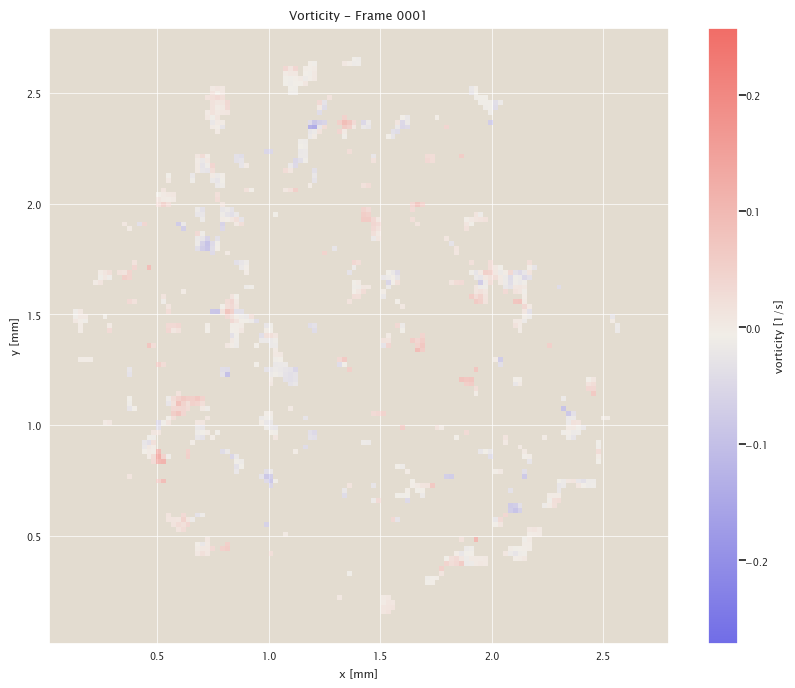

'Displayed the heatmap for the first frame in the notebook!'

In [16]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
from tqdm import tqdm

def plot_feature_heatmaps(feature_keywords, input_dir, output_dir, display_single_frame=False):
    """
    Plots combined heatmaps for the given features across all frames and saves them.
    
    Args:
    - feature_keywords (list of str): Keywords representing the desired features (e.g., ["velocity", "vorticity"]).
    - input_dir (str): Directory where the .txt files are located.
    - output_dir (str): Directory where the output plots should be saved.
    - display_single_frame (bool): If True, displays the heatmap of the first frame in the notebook itself.
    """
    
    # Mapping from user-friendly keywords to actual column names in the .txt files
    feature_mapping = {
        'velocity': 'magnitude [μm/s]',
        'vorticity': 'vorticity [1/s]',
        'divergence': 'divergence [1/s]',
        'shear': 'simple shear [1/s]',
        'strain': 'simple strain [1/s]'
    }
    
    # Mapping from feature to colormap
    colormap_mapping = {
        'velocity': 'viridis',
        'vorticity': 'bwr',
        'divergence': 'Set2',
        'shear': 'PiYG',
        'strain': 'coolwarm'
    }
    
    # Create combined feature name for folder and filenames
    combined_name = "_".join(feature_keywords) + ("_heatmap" if len(feature_keywords) > 1 else "")
    
    # Pattern for input .txt files
    input_pattern = os.path.join(input_dir, 'PIVlab_*.txt')
    
    # Create a dictionary to store global min and max values for each feature
    global_feature_range = {keyword: [float('inf'), float('-inf')] for keyword in feature_keywords}

    for filepath in glob.glob(input_pattern):
        df = pd.read_csv(filepath, sep=',', skiprows=2)
        
        # Add a new column for velocity in micrometers per second (μm/s)
        if 'magnitude [m/s]' in df.columns and 'magnitude [μm/s]' not in df.columns:
            df['magnitude [μm/s]'] = df['magnitude [m/s]'] * 1e6
        
        for keyword in feature_keywords:
            feature_column = feature_mapping[keyword]
            local_min = df[feature_column].min()
            local_max = df[feature_column].max()
            global_feature_range[keyword][0] = min(global_feature_range[keyword][0], local_min)
            global_feature_range[keyword][1] = max(global_feature_range[keyword][1], local_max)
    
    # Construct a new sub-directory path
    sub_dir = os.path.join(output_dir, combined_name)

    # Ensure the sub-directory exists
    if not os.path.exists(sub_dir) and not display_single_frame:
        os.makedirs(sub_dir)

    # Use these values to fix the range of the colormap when plotting each heatmap
    filepaths = sorted(glob.glob(input_pattern))
    
    for filepath in filepaths:
        frame_num = os.path.basename(filepath).split('_')[-1].split('.')[0]
        df = pd.read_csv(filepath, sep=',', skiprows=2)
        df['x [mm]'] = df['x [m]'] * 1000
        df['y [mm]'] = df['y [m]'] * 1000
        
        # Ensure the velocity column in micrometers per second is present
        if 'magnitude [m/s]' in df.columns and 'magnitude [μm/s]' not in df.columns:
            df['magnitude [μm/s]'] = df['magnitude [m/s]'] * 1e6
        
        fig, ax = plt.subplots(figsize=(10, 8))
        
        for keyword in feature_keywords:
            feature_column = feature_mapping[keyword]
            x = df['x [mm]'].values
            y = df['y [mm]'].values
            feature_values = df[feature_column].values

            xi = np.linspace(x.min(), x.max(), len(np.unique(x)))
            yi = np.linspace(y.min(), y.max(), len(np.unique(y)))
            zi = griddata((x, y), feature_values, (xi[None, :], yi[:, None]), method='linear')

            cmap = colormap_mapping[keyword]
            alpha = 0.5 if keyword != 'velocity' else 1.0  # Adjust alpha for overlapping

            c = ax.pcolormesh(xi, yi, zi, shading='auto', cmap=cmap, alpha=alpha, 
                              vmin=global_feature_range[keyword][0], 
                              vmax=global_feature_range[keyword][1])
            fig.colorbar(c, ax=ax, label=feature_column)

        ax.set_title(f"{combined_name.replace('_', ' ').title()} - Frame {frame_num}")
        ax.set_xlabel("x [mm]")
        ax.set_ylabel("y [mm]")

        # If display_single_frame is True, show the plot for the first frame and return
        if display_single_frame:
            plt.show()
            return "Displayed the heatmap for the first frame in the notebook!"
        
        filename = f'{combined_name}_{frame_num}.png'
        fig.savefig(os.path.join(sub_dir, filename))
        plt.close(fig)

    return f"Global min and max of features determined, and all combined plots saved in {sub_dir}!"

# For demonstration purposes, we'll redefine the input and output directories to work with the uploaded file
input_dir = 'C:/Users/dalar/OneDrive/Desktop/current_experiment/100223-kbio-500_250_125nM/pos1-250nM/piv-pos1-250nM/txt-250nM/'
output_dir = 'C:/Users/dalar/OneDrive/Desktop/current_experiment/100223-kbio-500_250_125nM/pos1-250nM/heatmaps/'

# Test the modified function with display_single_frame set to True
plot_feature_heatmaps(['vorticity'], input_dir, output_dir, display_single_frame=True)
